In [1]:
from attention import AttentionLayer 
# Attention is a simple vector.
# It allows machine translator to look over all the information the original sentence holds, 
# then generates the proper word according to the current word it works on and the context.

In [2]:
# Importing the libraries

import numpy as np
import pandas as pd 

# Support for regular expressions
import re

import requests
from urllib.request import urlopen


# Importing BeautifulSoup4 is a library for pulling out data from HTML and XML files.
from bs4 import BeautifulSoup

# Using keras
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

# Using NATURAL LANGUAGE TOOL-KIT
from nltk.corpus import stopwords

# Using Tensorflow
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

import warnings

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore") ## Doesn't display warnings

Using TensorFlow backend.


In [3]:
data=pd.read_csv("Reviews.csv",nrows=15000) # Reading the dataset
# The data set has 500,000 data sets but i have used only 100,000.
# We can use more but i dont have the computational power.

In [4]:
print(data) # Printd data of the csv file.

          Id   ProductId          UserId                      ProfileName  \
0          1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1          2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2          3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3          4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4          5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...      ...         ...             ...                              ...   
14995  14996  B000EGZ99M   AH720G9X1MIQ8                              KJT   
14996  14997  B000EGZ99M  A1MW2HEG4LF56B                     S. Mariconda   
14997  14998  B000EGZ99M  A1GY0FE07QFFLF                   Arlington Cory   
14998  14999  B000EGZ99M  A2N8ZFDXI5T6BW                        Beverleaf   
14999  15000  B000EGZ99M   ACLTZ4KSPHG1N                jodimae "jodimae"   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0

In [5]:
data.drop_duplicates(subset=['Text'],inplace=True) # drop the duplicates.

data.dropna(axis=0,inplace=True) # drop rows and columns that have NULL values.

In [6]:
data.info() # Get the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14413 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      14413 non-null  int64 
 1   ProductId               14413 non-null  object
 2   UserId                  14413 non-null  object
 3   ProfileName             14413 non-null  object
 4   HelpfulnessNumerator    14413 non-null  int64 
 5   HelpfulnessDenominator  14413 non-null  int64 
 6   Score                   14413 non-null  int64 
 7   Time                    14413 non-null  int64 
 8   Summary                 14413 non-null  object
 9   Text                    14413 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.2+ MB


In [7]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
# A dictionary to use when expanding the contractions.

In [8]:
stop_words = set(stopwords.words('english')) 

In [9]:
print(stop_words)

{"you've", "isn't", 'me', 'a', 't', 'out', 'ain', 'she', 're', 'before', 'under', 'll', 'my', 's', 'above', "should've", 'will', 'by', 'ma', 'of', 'few', 'at', 'what', 'm', 'as', 'other', "weren't", 'some', "couldn't", 'its', 'no', "hadn't", 'd', 'we', 'this', 'her', 'do', 'is', 'having', 'these', 'off', 'against', 'when', 'than', 'mightn', 'such', "you'd", 'won', "doesn't", 'until', 'theirs', 'too', 'herself', 'y', 'which', 'during', 'being', 'had', 'for', 'because', 'himself', 'so', 'hers', "mustn't", 'those', 'below', 'his', 'doesn', 'themselves', 'any', 'again', "haven't", 'him', 'between', "you'll", "don't", 'then', 'very', "it's", 'shan', 'where', 'more', 'yourselves', 'all', 'most', 'each', 'through', 'isn', 'only', 'am', 'wouldn', 'our', 'don', 'be', 'did', 'does', 'their', "she's", 'mustn', 'and', 'on', 'up', 'further', 'hasn', 'doing', 'wasn', 'but', 'aren', 'he', 'or', 'it', 'an', "shouldn't", 'weren', 'there', 'couldn', 'didn', "you're", 'why', "mightn't", 'you', 'the', 'sa

In [10]:
def text_cleaner(text,num):
    newString = text.lower() # Covert to lower-case
    
    newString = BeautifulSoup(newString, "lxml").text # Extract the data
    
    # Remove HTML tags.
    # Remove 's
    # Remove text inside parathesis ()
    # Remove punctuation and special characters
    # Remove stop words
    # Remove short words
    
    newString = re.sub(r'\([^)]*\)', '', newString) 
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)   # Remove 's
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [11]:
# Call the defined function.
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0))

In [12]:
cleaned_text[:5] # Some pre-processed reviews.

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [13]:
# Call the fuction text_cleaner
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [14]:
cleaned_summary[:10] # Summary of some reviews.

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [15]:
data['cleaned_text']=cleaned_text # Store the text
data['cleaned_summary']=cleaned_summary # Store the summary

In [16]:
# Remove empty rows
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

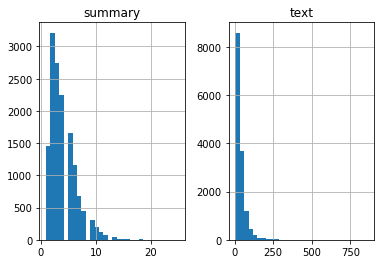

In [17]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [18]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=8):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))
# 94% of the summaries length is below 8 so, we have set max to 8

0.9447955003124783


In [19]:
max_text_len=30
max_summary_len=8

In [20]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})


In [21]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [22]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True)

In [23]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer to review the training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [24]:
# Defining rare words if thresh < 4 is considered as a rare word.
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

# tot_cnt - gives the size of vocabulary (which means every unique words in the text)

# cnt - gives the no. of rare words whose count falls below threshold (<4)

# tot_cnt - cnt gives me the top most common words


% of rare words in vocabulary: 67.63814180929096
Total Coverage of rare words: 7.532805149789552


In [25]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [26]:
x_voc

3310

In [27]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [28]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 83.32840673958025
Total Coverage of rare words: 12.487614150665488


In [29]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [30]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(7149, 7149)

In [31]:
# Delete rows that contain START
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [32]:
# Delete rows that contain END
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [33]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input (shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 100)      331000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 30, 300), (N 481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [34]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [35]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [36]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 6709 samples, validate on 750 samples
Epoch 1/50
6709/6709 [==============================] - 123s 18ms/sample - loss: 2.8532 - val_loss: 2.3644
Epoch 2/50
6709/6709 [==============================] - 134s 20ms/sample - loss: 2.3263 - val_loss: 2.2680
Epoch 3/50
6709/6709 [==============================] - 137s 20ms/sample - loss: 2.2368 - val_loss: 2.1949
Epoch 4/50
6709/6709 [==============================] - 138s 21ms/sample - loss: 2.1701 - val_loss: 2.1471
Epoch 5/50
6709/6709 [==============================] - 141s 21ms/sample - loss: 2.1281 - val_loss: 2.1180
Epoch 6/50
6709/6709 [==============================] - 140s 21ms/sample - loss: 2.0902 - val_loss: 2.0934
Epoch 7/50
6709/6709 [==============================] - 141s 21ms/sample - loss: 2.0526 - val_loss: 2.0967
Epoch 8/50
6709/6709 [==============================] - 140s 21ms/sample - loss: 2.0178 - val_loss: 2.0569
Epoch 9/50
6709/6709 [==============================] - 139s 21ms/sample - loss: 1.9836 - val_los

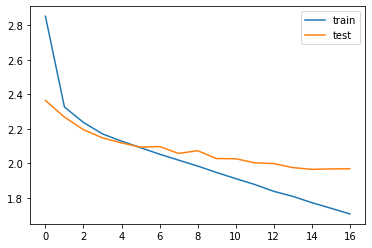

In [37]:
# Diagnostic plot
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
# build a dictionary to convert the index to word for target and source vocabulary
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [39]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [40]:
# Function to implement the interface
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [41]:
# functions to convert an integer sequence to a word sequence for summary as well as the reviews
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [44]:
for i in range(0,5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: chips pretty delicious even original flavor nothing good delicious also fried either definitely good snack times day 
Original summary: pretty delicious 
Predicted summary:  great


Review: regular customers delicious coffee purchase french roast also makes single fresh cup time coffee maker 
Original summary: love coffee 
Predicted summary:  great coffee


Review: love powder must blends may recommend powder try different peppers different amounts amazing results 
Original summary: good quality price 
Predicted summary:  great


Review: due year say coffee best substitute keurig based cafe attempt tasty dark blend look emeril time head cup 
Original summary: dark blend to coffee 
Predicted summary:  great coffee


Review: bars taste lot like candy least quite awhile plan one warning easy digestion eat slowly tempted eat one 
Original summary: tastes pretty to candy 
Predicted summary:  great


